<a href="https://www.kaggle.com/code/shehabemad2/eda-feature-eng-and-82-score?scriptVersionId=105130921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
#Read the data
df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
print ("Importing Done")
# note that there is no index col so we will add one by not specifying the index_col argument

Importing Done


## Exploring the data:

In [3]:
df.sample(5)
# this methode get a random samples of the data,
# sometimes it's better to see random records rather than the head

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3884,2022-07-06,3,58000,1700,11 out of 17,Carpet Area,TNGOS Colony,Hyderabad,Furnished,Bachelors/Family,3,Contact Agent
3387,2022-07-06,1,7500,450,Ground out of 2,Super Area,Mugalivakkam,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
4319,2022-06-18,1,9000,500,4 out of 4,Super Area,KPHB Road,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
941,2022-05-10,3,32000,1200,4 out of 5,Super Area,"Ishwardas Bhuvan CHS, Kandivali East",Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Owner
1911,2022-06-29,1,11000,600,Ground out of 3,Super Area,"Maruthi Extesnion, Rajajinagar",Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [4]:
df.info()
# So luckly there aren't any missing values. 
#data types are either object or integers so will explore this more 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()
#just to make sure :)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
df.describe()
#we can see that there are many diffrent houses sizes from 10 and up to 8000 square feets
#with a mean of nearly 1000 , which surly needs to be normalized. 

# same with the rent we can see that it starts from 1200 and goes up to 3,500,000
#while the mean is actually 35000

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df['Posted On'].unique()
# we can see that all data are from 2022 from month 4-7
#we might categorize them based on the month of selling maybe?

array(['2022-05-18', '2022-05-13', '2022-05-16', '2022-07-04',
       '2022-05-09', '2022-04-29', '2022-06-21', '2022-06-07',
       '2022-06-20', '2022-05-23', '2022-05-14', '2022-05-05',
       '2022-06-01', '2022-05-17', '2022-06-09', '2022-07-02',
       '2022-06-14', '2022-06-15', '2022-05-28', '2022-05-22',
       '2022-06-18', '2022-06-25', '2022-06-22', '2022-05-21',
       '2022-06-26', '2022-06-16', '2022-06-29', '2022-05-10',
       '2022-05-12', '2022-06-03', '2022-05-31', '2022-06-10',
       '2022-06-24', '2022-04-30', '2022-05-27', '2022-06-06',
       '2022-05-20', '2022-05-26', '2022-07-03', '2022-04-23',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-05-30',
       '2022-06-08', '2022-05-03', '2022-05-07', '2022-06-27',
       '2022-05-15', '2022-04-28', '2022-06-28', '2022-06-23',
       '2022-06-13', '2022-05-04', '2022-04-25', '2022-05-06',
       '2022-06-30', '2022-07-01', '2022-06-17', '2022-06-11',
       '2022-05-11', '2022-06-12', '2022-06-05', '2022-

In [8]:
df['Floor'].unique()
# here we can see that the first number/word describes the floor
#while the last one describes the total floors in the building
#so maybe we can extract 2 more features out of this ?

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [9]:
df['Area Type'].unique()
#you can understand the diffrance between every type in here  
# https://www.sobha.com/blog/carpet-area-built-up-area-super-built-up-area/#:~:text=A%20built%2Dup%20area%20includes,other%20amenities%2C%20and%20is%20also
#however it's baiscally the type of house building  

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [10]:
df['Area Locality'].value_counts()
#The local area of the house, might drop it or search for a more meaningful representaion 

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [11]:
df['City'].value_counts()
#much more representitive than area locality

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [12]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [13]:
df['Tenant Preferred'].unique()
#Type of Tenant Preferred by the Owner or Agent, might be helpfull 

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [14]:
df['Point of Contact'].value_counts()
#maybe Agent houses are more expensive ?

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

## Data preprocessing

In [15]:
Date_split = df['Posted On'].str.split(pat = "-",n=2, expand=True).iloc[:,1]
#here we split and pick the month out of Posted On as all years are 2022 we only can use the month

In [16]:
df_pre = df.copy()

In [17]:
df_pre['Rent'] = np.log1p(df['Rent'])

In [18]:
df_pre['Month of Sale'] = Date_split.astype(int)

In [19]:
df_pre['House Floor'] = 0
list0 = df['Floor'].str.split(pat = " ",n=2, expand=True).iloc[:,0]
for i,v in enumerate(df['Floor']):
    if list0.iloc[i] =='Ground':
        df_pre['House Floor'][i] = 0
        
    elif list0.iloc[i] =='Upper':
        df_pre['House Floor'][i] = -1
    elif list0.iloc[i] =='Lower':
        df_pre['House Floor'][i] = -2
    else : 
        df_pre['House Floor'][i] = list0[i]


#here we drived a new col which is the floor of the house

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyW

In [20]:
df_pre['Max Floors'] =0
list1 = df['Floor'].str.split(pat = ' ', n=-1, expand=True)
for i,v in enumerate(df['Floor']):
    
    if len(v) > 20 :
        df_pre['Max Floors'][i] = list1.iloc[i,-1]
    elif len(v) > 10:
        df_pre['Max Floors'][i] = list1.iloc[i,-2]
    else:
        if list1.iloc[i,0] == 'Ground':
            df_pre['Max Floors'][i] = 0 
        else:
            df_pre['Max Floors'][i] = list1.iloc[i,0] 

#here we define a new feature which is the building total floors 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 


In [21]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
 12  Month of Sale      4746 non-null   int64  
 13  House Floor        4746 non-null   int64  
 14  Max Floors         4746 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 556.3+ KB


we can now drop the exess columns

In [22]:
df_pre = df_pre.drop(['Posted On','Floor','Area Locality'], axis = 1)

In [23]:
Num_features = ['Max Floors','House Floor']
for name in Num_features:
    df_pre[name] = df_pre[name].astype("int")
    
    #here we change our numeric features into int rather than object

In [24]:
Cat_features = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact','Month of Sale']
for name in Cat_features:
    df_pre[name] = df_pre[name].astype("category")
    
    #here we change our Categorical features into category rather than object

In [25]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                4746 non-null   int64   
 1   Rent               4746 non-null   float64 
 2   Size               4746 non-null   int64   
 3   Area Type          4746 non-null   category
 4   City               4746 non-null   category
 5   Furnishing Status  4746 non-null   category
 6   Tenant Preferred   4746 non-null   category
 7   Bathroom           4746 non-null   int64   
 8   Point of Contact   4746 non-null   category
 9   Month of Sale      4746 non-null   category
 10  House Floor        4746 non-null   int64   
 11  Max Floors         4746 non-null   int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 251.3 KB


In [26]:
print ('Min rent is :'  + str(df_pre['Rent'].min()) + '\nMax rent is :' + str(df_pre['Rent'].max()))
#we can devide the rent by 1000 to normalize a bit 


Min rent is :7.0909098220799835
Max rent is :15.068273812173887


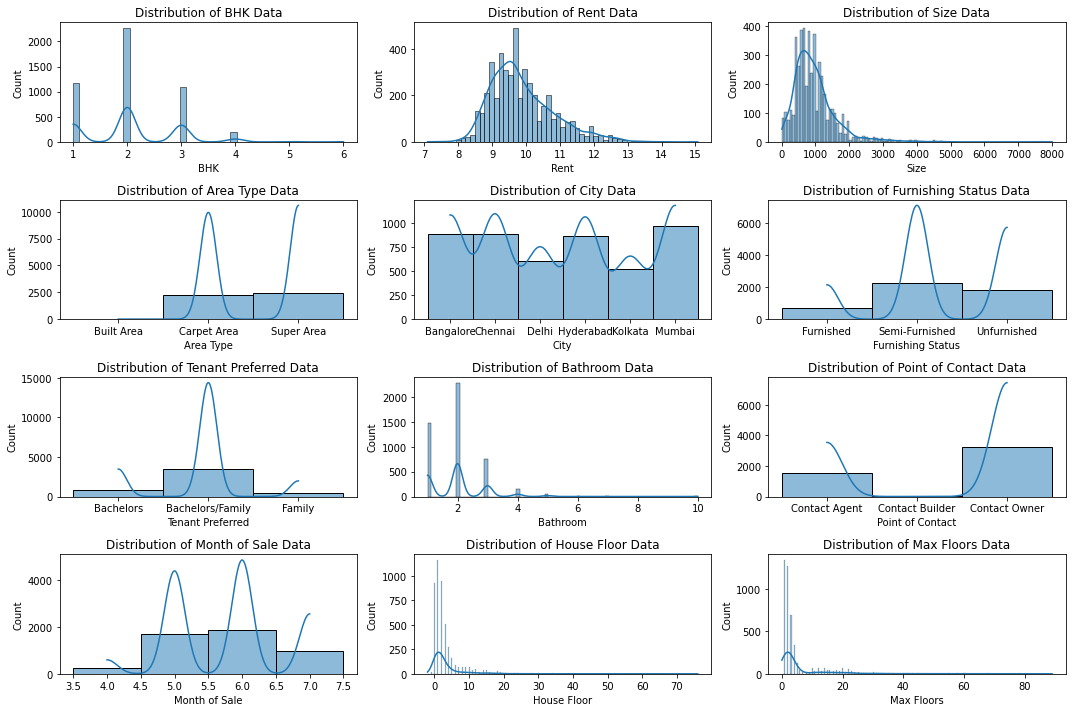

In [27]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_pre.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of " + col +  " Data")
    sns.histplot(df_pre[col],kde=True)
    plt.tight_layout()
    plt.plot()


from previous plots we can note that :
* most houses are less than 2000 square feets
* there are only few Built Area
* most houses are sold at month 5 and 6
* most houses are less than 5 floors

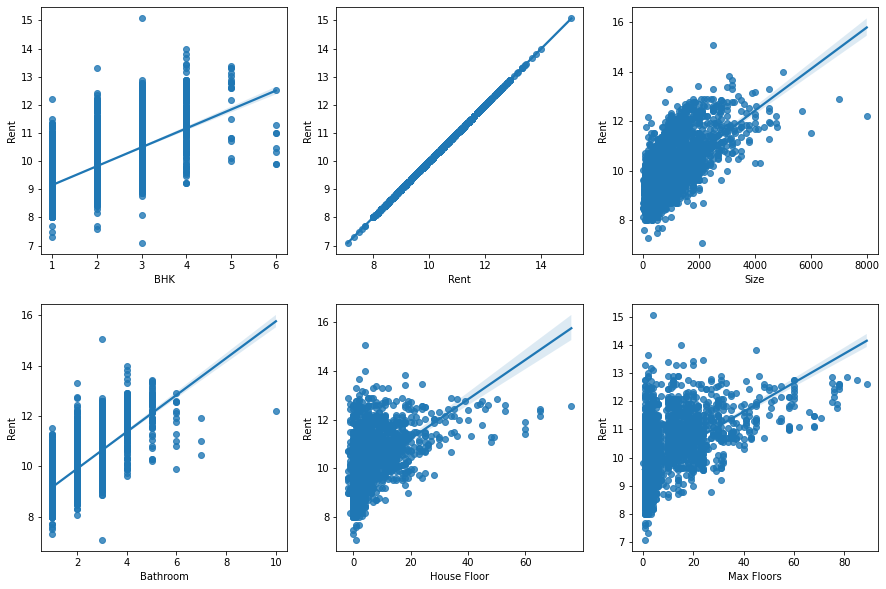

In [28]:
num_col = [col for col in df_pre.columns if df_pre[col].dtypes != 'category']
plt.figure(figsize=(15,10))
for i in range(len(num_col)):
    plt.subplot(2,3,i+1)
    sns.regplot(x=num_col[i], y="Rent", data=df_pre);


In [29]:
for col in df_pre.columns:
    fig=px.histogram(df_pre, 
                 x="Rent",
                 color=col,
                 title="Distribution of Rent vs " + col,
                 barmode="group")
    fig.show()

In [30]:
fig=px.histogram(df_pre[df_pre['Max Floors']< 5], 
                 x="Rent",
                 color=col,
                 title="Distribution of Rent vs " + col,
                 barmode="group")
fig.show()

In [31]:
df_pre[df_pre["Size"]>5000]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month of Sale,House Floor,Max Floors
2048,4,12.429220,5700,Carpet Area,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent,5,24,25
3622,5,11.512935,6000,Super Area,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent,5,9,12
4185,1,12.206078,8000,Super Area,Hyderabad,Unfurnished,Bachelors/Family,10,Contact Owner,6,0,4
4457,4,12.899222,7000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,6,Contact Agent,7,-2,2


a house with 10 bathrooms and only 1 bhk is a bit weird, so maybe it's a house for 10 with 10 bathrooms but 1 room per resenent, which might make more sense as the size of the house is 8000 sqr feet 
will assume it's a mistake and will correct it to 8 roams 


In [32]:
df_pre.loc[4185 , 'BHK'] = 8

In [33]:
df_pre[df_pre["Size"]>5000]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month of Sale,House Floor,Max Floors
2048,4,12.429220,5700,Carpet Area,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent,5,24,25
3622,5,11.512935,6000,Super Area,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent,5,9,12
4185,8,12.206078,8000,Super Area,Hyderabad,Unfurnished,Bachelors/Family,10,Contact Owner,6,0,4
4457,4,12.899222,7000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,6,Contact Agent,7,-2,2


In [34]:
Y = df_pre['Rent']
df_mi = df_pre.drop('Rent',axis = 1)
df_mi = pd.get_dummies(df_mi)

In [35]:
mi_scores = mutual_info_regression(df_mi ,Y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_mi.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Bathroom                             0.329501
BHK                                  0.250732
Point of Contact_Contact Owner       0.237945
Size                                 0.237595
Point of Contact_Contact Agent       0.225512
City_Mumbai                          0.183101
Max Floors                           0.173097
House Floor                          0.147360
Area Type_Carpet Area                0.095521
Area Type_Super Area                 0.087637
City_Kolkata                         0.051920
Furnishing Status_Unfurnished        0.028547
Tenant Preferred_Bachelors/Family    0.020813
City_Chennai                         0.019143
Furnishing Status_Furnished          0.018149
Tenant Preferred_Family              0.017451
Month of Sale_4                      0.015778
Tenant Preferred_Bachelors           0.011971
Furnishing Status_Semi-Furnished     0.011871
City_Hyderabad                       0.005825
City_Bangalore                       0.005098
City_Delhi                        

In [36]:
px.imshow(df_pre.corr(),title="Correlation Plot")

From the previous regplot, mi score and correlation plot we can notice that :

there aren't any specific strong realtion but the best we could ask for till now is Bathrooms, BHK,However i belive we could get better results and realtions with PCA, clustring and some feature Engineering


In [37]:
df.groupby(["City"])["Size",'BHK','Rent'].agg([min,max,np.mean])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Size                    BHK                Rent           \
           min   max         mean min max      mean   min      max   
City                                                                 
Bangalore   50  5700   985.925508   1   4  1.930023  3500  3500000   
Chennai     80  6000  1031.713805   1   6  2.124579  3000   600000   
Delhi       25  4000   786.406612   1   5  2.114050  2000   530000   
Hyderabad   10  8000  1186.669355   1   6  2.206221  1200   400000   
Kolkata     20  4000   787.366412   1   6  1.965649  1500   180000   
Mumbai     160  5000   905.904321   1   5  2.122428  4500  1200000   

                         
                   mean  
City                     
Bangalore  24966.365688  
Chennai    21614.092031  
Delhi      29461.983471  
Hyderabad  20555.048387  
Kolkata    11645.173664  
Mumbai     85321.204733

In [38]:
## we can notice the price diffrance between diffrent sizes at diffrent cities
## dfor example : a 50 sqr feet house in Bangalore is more expensive than a 80 in Chennai
## and same goes for the max price at Bangalore
#on the other hand Kolkata seems much more cheep than other cities 

# bang = 5
# Chen = 4
# Delhi =6
# Hyderabad =3 
# Kolkata = 1 
# Mumbai = 2




## Feature Engineering:


In [39]:
#lets make a function that could manage some new manually added features:
def add_new_features(data):
    ## maybe we can transform the are into meters as 8000 semms like a huge number to work with 
    #to get are in meters divide the area value by 10.764
    data['Area_m'] = data['Size'] / 10.764
    
    ## maybe we cann summ all house roams?
    data['All_Roams'] = data['Bathroom'] + data['BHK']
    data = data.drop('Size' , axis=1)
    

    ## maybe we can make a category for if it's a Tower or maybe just a House
    data['Building_type'] = ''
    for i,v in enumerate(data['Max Floors']):
        
        if v > 40 :
            data['Building_type'][i] = 'Skyscraper'
        elif v >20 :
            data['Building_type'][i] = 'Tower'
        elif v> 4 :
            data['Building_type'][i] = 'Small Tower'
        else :
            data['Building_type'][i] = 'House'
            
        #data['Building_type'] = data['Building_type'].astype("category")
        
      ## estimated room size:
    data['Roam_size'] = data['Area_m'] / data["All_Roams"]
    
    ## a relation based on the previous groupby notices
    
    data['City_Size'] = 0
    for i,v in enumerate(data["City"]) :
        if v == "Bangalore" :
            data['City_Size'][i] = 5*data['Area_m'][i]
        elif v == "Chennai" :
            data['City_Size'][i] = 4*data['Area_m'][i]
        elif v == "Delhi" :
            data['City_Size'][i] = 6*data['Area_m'][i]
        elif v == "Hyderabad" :
            data['City_Size'][i] = 3*data['Area_m'][i]
        elif v == "Mumbai" :
            data['City_Size'][i] = 2*data['Area_m'][i]
        else :
            data['City_Size'][i] = data['Area_m'][i]
        
        
        
    data['CITY_RENT_MEAN'] = data.groupby('City')['Rent'].transform('mean')
    data['CITY_RENT_MAX'] = data.groupby('City')['Rent'].transform('max')
    data['CITY_RENT_MIN'] = data.groupby('City')['Rent'].transform('min')
    data['CITY_SIZE_MEAN'] = data.groupby('City')['Area_m'].transform('mean')
    data['CITY_SIZE_MAX'] = data.groupby('City')['Area_m'].transform('max')
    data['CITY_SIZE_MIN'] = data.groupby('City')['Area_m'].transform('min') 
    
    data['Size_Mean_Rat'] = data['CITY_SIZE_MEAN'] / data['Area_m']
    data['Size_Max_Rat'] = data['CITY_SIZE_MAX'] / data['Area_m']
    data['Size_Min_Rat'] = data['CITY_SIZE_MIN'] / data['Area_m']
    
    return data
            


In [40]:

def handle_outliers_iqr(data):
    
    data_out = data.copy()
    q1 = np.percentile(data_out, 25)
    q3 = np.percentile(data_out, 75)
    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    fifth_percentile = np.percentile(data_out, 5)
    ninetieth5_percentile = np.percentile(data_out, 95)
    for i,v in enumerate(data_out): 
        if (v<lwr_bound or v>upr_bound):
            data_out.iloc[i] = np.where(v<fifth_percentile, fifth_percentile, data_out.iloc[i])
            data_out.iloc[i] = np.where(v>ninetieth5_percentile, ninetieth5_percentile, data_out.iloc[i])
            
            
    data = data_out
    
    return data


In [41]:
def PCA_(data, n):
    
    df_s = pd.get_dummies(data, drop_first = True)
    
    cols = ['House Floor','Max Floors','Area_m','Roam_size','City_Size']
    df_s[cols] = StandardScaler().fit_transform(df_s[cols])
    
    
    pca = PCA(n_components=n)
    x = pca.fit_transform(df_s)
    component_names = [f"PC{i+1}" for i in range(x.shape[1])]
    x = pd.DataFrame(x, columns=component_names)
    x2 = df_s.copy()
    for k in x.columns:
        x2[k] = x['PC1']
        for i in range(x.shape[0]):
            x2[k][i] = x[k][i]
    return x2

In [42]:
#will drop uninfomative features 
def drop_uninformative(data, mi_scores):
    
    return data.loc[:, mi_scores > 0.01]

In [43]:
# time to add all what we've done 
X = df_pre.copy()


## first handling outliers on size col

X['Size'] = handle_outliers_iqr(X['Size'])

#then we add the new features from feature engineering
X=add_new_features(X)

Y = X.pop('Rent')

#we add the PCA components
X = PCA_(X,8)

mi_scores = mutual_info_regression(X ,Y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

#we then drop the drop_uninformative

X= drop_uninformative(X, mi_scores)

X.info()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is tryi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4746 non-null   int64  
 1   Bathroom                           4746 non-null   int64  
 2   House Floor                        4746 non-null   float64
 3   Max Floors                         4746 non-null   float64
 4   Area_m                             4746 non-null   float64
 5   All_Roams                          4746 non-null   int64  
 6   Roam_size                          4746 non-null   float64
 7   City_Size                          4746 non-null   float64
 8   CITY_RENT_MEAN                     4746 non-null   float64
 9   CITY_RENT_MAX                      4746 non-null   float64
 10  CITY_RENT_MIN                      4746 non-null   float64
 11  CITY_SIZE_MEAN                     4746 non-null   float

In [44]:
mi_scores

PC1                                  0.705582
PC2                                  0.498643
City_Size                            0.450584
PC3                                  0.429060
Size_Mean_Rat                        0.396638
PC5                                  0.371594
Size_Max_Rat                         0.368729
All_Roams                            0.366107
PC4                                  0.346791
Bathroom                             0.343422
Area_m                               0.337280
Size_Min_Rat                         0.335831
BHK                                  0.260478
CITY_RENT_MEAN                       0.243534
CITY_SIZE_MEAN                       0.241386
CITY_RENT_MIN                        0.231205
CITY_RENT_MAX                        0.222595
CITY_SIZE_MIN                        0.220545
Point of Contact_Contact Owner       0.217144
Max Floors                           0.212767
House Floor                          0.196465
City_Mumbai                       

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [47]:
xgr = XGBRegressor()

In [48]:
param_lst = {
    "learning_rate" : [00.1,0.05,0.1,0.2,0.3],
    "n_estimators" : [100,300,500,700,1000],
    "max_depth" : [4,6,9],
    "min_child_weight" : [1,5,10,20,30],
    "reg_alpha" : [0.001,0.01,0.1],
    "reg_lambda" : [0.001,0.01,0.1]
    
}

In [49]:
xgREg = RandomizedSearchCV(estimator=xgr,param_distributions=param_lst,
                            n_iter = 5,scoring="neg_root_mean_squared_error",cv = 5)

In [50]:
xgREg = xgREg.fit(X_train,y_train)

best_param = xgREg.best_params_

xgREg = XGBRegressor(**best_param,objective='reg:squarederror')

In [51]:
def mean_cross_value(model,X,y):
    score = cross_val_score(model,X,y,cv=5)
    mean = score.mean()
    return mean

In [52]:
xgREg.fit(X_train,y_train)
preds = xgREg.predict(X_test)
mae_xgb = mean_absolute_error(y_test,preds)
rmse_xgb = np.sqrt(mean_absolute_error(y_test,preds))
score_xgb = xgREg.score(X_test,y_test)
cv_xgb = mean_cross_value(xgREg,X_train,y_train)

In [53]:
model_performances = pd.DataFrame({
    "Model":["XGBoost"],
    "CV(5)" : [str(cv_xgb)],
    "MAE" : [str(mae_xgb)],
    "RMSE" : [str(rmse_xgb)],
    "Score" : [str(score_xgb)]
})

In [54]:
model_performances

,Model,CV(5),MAE,RMSE,Score
0,XGBoost,0.8134108611337625,0.30621822833225837,0.5533698838320156,0.8087863718107161


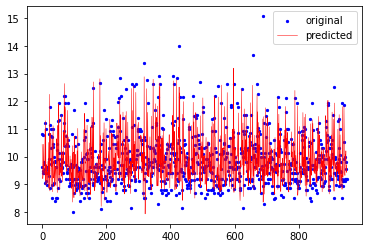

In [55]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, preds, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()


Finally i belive you can surly exceed my model with your own work, and i hope you can make use of my 
code and improve it even more.

quick thoughts on things you might wanna try:
- More diffrent models surly would be a great approach here and might ger you better results specially with the ouliars
- More feature engineering is always a great idea to try, maybe play with transformars or something
- Try to make a better EDA to investigate the data even more